<img src="https://miro.medium.com/max/1024/1*Cku5-rqmqSIuhUyFkIAdIA.png"><br>
# <center>Predicting Apple Stock Prices Using PyCaret</center>

Who wouldn't like to have the hability to predict the future prices of stocks and other financial assets? Such skill would help us to make investment decisions without falling prey to the strong emotions of **doubt**, **fear** and **panic** that takes so many investors and traders into a path of losing money in the long run.<br><br>
With this idea in mind, I decided to develop a **machine learning** model to try to forecast the prices of Apple stocks through <a href = "https://www.ibm.com/topics/linear-regression">**linear regression** analysis</a>.<br><br>
While I was studying on how to make such predictions, I came across a library called <a href = "https://pycaret.org/">PyCaret</a>, which is an open-source, low-code machine learning library in Python that automates machine learning workflows, ideal for those who are beginners in machine learning, such as myself.<br><br>
Before starting the development of this project, I'd like to make it clear that this is nothing but a study on how to use PyCaret's regression lib to make predictions and I have no intention whatsoever to recommend you to buy or sell any financial asset. There are a lot of factors when it comes to making the market go up or down and no mathematical model will be able to predict with 100% accuracy news, wars, conflicts or any other thing that may trigger the feelings of **fear** or **greed** in investors.

# Importing Libraries

In [1]:
# Importing libraries
import pandas as pd, plotly.express as px, pandas_profiling as pp, yfinance as yf, plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"

# Obtaining Data

In [2]:
# Obtaining data 
df = yf.Ticker('AAPL')
# Selecting historical prices period
aapl = df.history(period='20y') # Last 20 years
# See dataframe
aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-06-11,0.330404,0.331319,0.311623,0.312387,349496000,0.0,0.0
2002-06-12,0.311623,0.316815,0.304447,0.306738,528718400,0.0,0.0
2002-06-13,0.305669,0.306127,0.295897,0.298340,352083200,0.0,0.0
2002-06-14,0.293759,0.310860,0.276507,0.306891,424900000,0.0,0.0
2002-06-17,0.309028,0.314983,0.303073,0.313608,324609600,0.0,0.0
...,...,...,...,...,...,...,...
2022-06-06,147.029999,148.570007,144.899994,146.139999,71598400,0.0,0.0
2022-06-07,144.350006,149.000000,144.100006,148.710007,67808200,0.0,0.0
2022-06-08,148.580002,149.869995,147.460007,147.960007,53950200,0.0,0.0


# Exploratory Analysis

In [3]:
# Using Pandas Profiling to generate a report on our dataframe
Profile_1 = pp.ProfileReport(aapl)
Profile_1.to_file("Report1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<br>
<font color = red><b>Note:</b></font> Unfortunately Pandas Profiling Reports <b>can't</b> be displayed on GitHub. However, <b>Report1.html</b> is available in this repository to be <b>downloaded</b> and you will be able to have full acess to the report and check all the informations available.

The dataframe that we've obtained from **Yahoo Finance** through the *yfinance* library contains the trading day as index and 7 other columns whose content are as follows: <br><br>
- **Open**: The opening price of that day.<br><br>
- **High**: The highest price that Apple stocks were negotiated that day.<br><br>
- **Low**: The lowest price that Apple stocks were negotiated that day.<br><br>
- **Close**: The last price negotiated for Apple stocks that day.<br><br>
- **Volume**: Total financial volume of all negotiations that were made in that specific day.<br><br>
- **Dividends**: Dividends paid that day.<br><br>
- **Stock Splits**: Stock splits in that specific day.

Using Pandas Profiling, we're able to observe that there are high correlation degrees between the low, high, open and closing prices.<br><br>
![correlations1.png](correlations1.png)<br><br>
Dividends is mostly composed by zeros (99.2% of all instances).<br><br>
![dividends.png](dividends.png)<br><br>
The period analyzed goes from **June 11th, 2002** to **June 10th, 2022**.<br><br>
![date.png](date.png)<br><br>

# Removing Columns<br><br>
For this study, there will be no use for the columns *Dividends* and *Stock Splits*, so we will drop them from our dataframe.

In [4]:
# Removing 'Dividends' and 'Stock Splits' columns
aapl = aapl.drop(['Dividends','Stock Splits'], axis = 1)
# See results
aapl

,Open,High,Low,Close,Volume
Date,,,,,
2002-06-11,0.330404,0.331319,0.311623,0.312387,349496000
2002-06-12,0.311623,0.316815,0.304447,0.306738,528718400
2002-06-13,0.305669,0.306127,0.295897,0.298340,352083200
2002-06-14,0.293759,0.310860,0.276507,0.306891,424900000
2002-06-17,0.309028,0.314983,0.303073,0.313608,324609600
...,...,...,...,...,...
2022-06-06,147.029999,148.570007,144.899994,146.139999,71598400
2022-06-07,144.350006,149.000000,144.100006,148.710007,67808200
2022-06-08,148.580002,149.869995,147.460007,147.960007,53950200


# Adding Simple Moving Averages <br><br>
In order to increase the number of features to be analyzed by PyCaret's Regression models, I'll add two simple moving averages for the *target variable*, which is the closing price, expecting it to improve the accuracy values of our models.

In [5]:
# Adding two simple moving averages in order to increase the number of features to be analyzed by PyCaret Regression models
aapl['SMA7'] = aapl.Close.rolling(window=7).mean().round(2)
aapl['SMA30'] = aapl.Close.rolling(window=30).mean().round(2)
# See results
aapl

,Open,High,Low,Close,Volume,SMA7,SMA30
Date,,,,,,,
2002-06-11,0.330404,0.331319,0.311623,0.312387,349496000,NaN,NaN
2002-06-12,0.311623,0.316815,0.304447,0.306738,528718400,NaN,NaN
2002-06-13,0.305669,0.306127,0.295897,0.298340,352083200,NaN,NaN
2002-06-14,0.293759,0.310860,0.276507,0.306891,424900000,NaN,NaN
2002-06-17,0.309028,0.314983,0.303073,0.313608,324609600,NaN,NaN
...,...,...,...,...,...,...,...
2022-06-06,147.029999,148.570007,144.899994,146.139999,71598400,147.67,150.13
2022-06-07,144.350006,149.000000,144.100006,148.710007,67808200,148.38,149.67
2022-06-08,148.580002,149.869995,147.460007,147.960007,53950200,148.14,149.38


In [6]:
# Generating new report with pandas_profiling
Profile_2 = pp.ProfileReport(aapl)
Profile_2.to_file("Report2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<br>
<font color = red><b>Note:</b></font> Unfortunately Pandas Profiling Reports <b>can't</b> be displayed on GitHub. However, <b>Report2.html</b> is available in this repository to be <b>downloaded</b> and you will be able to have full acess to the report and check all the informations available.

It's possible to observe that the *SMA7* column has 6 missing values and the *SMA30* column has 29 missing values, which is normal considering that these columns will only have enough data to display their moving average values on the 7th and 30th day respectively.<br><br>
![SMAs.png](SMAs.png)<br><br>
Through the correlation matrix, it's possible to observe that both moving averages added presents high levels of correlation with the open, low, high, and closing prices.<br><br>
![correlations2.png](correlations2.png)<br><br>

# Plotting a Candlestick Chart of The Last 20 Years

In [7]:
# Using plotly to plot a candlestick chart of the last 20 years
fig = go.Figure(data=[go.Candlestick(x = aapl.index,
                                    open = aapl.Open,
                                    high = aapl.High,
                                    low = aapl.Low,
                                    close = aapl.Close),
                     go.Scatter(x=aapl.index, y = aapl.SMA7, line=dict(color='orange',width=1),name='SMA7'),
                     go.Scatter(x=aapl.index, y = aapl.SMA30, line=dict(color='green',width=1.5),name='SMA30')])
fig.update_layout(title = 'Apple stocks from June 11th, 2002 to June 10th, 2022')
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,)
fig.show()

# Creating a New Dataframe <br><br>
I'll create a new dataframe containing data from the last **2 years** and I'll use this data to test how well our predicting model will predict the closing prices of the last 2 trading years.

In [8]:
# Creating a new dataframe containing the last 2 years data to later test how well our predicting model will compare to the closing prices
aapl_predict = aapl.tail(506)
# See results
aapl_predict

,Open,High,Low,Close,Volume,SMA7,SMA30
Date,,,,,,,
2020-06-10,85.902091,87.598403,85.455173,87.121857,166651600,82.28,77.61
2020-06-11,86.250247,86.682351,82.835402,82.939102,201662400,82.72,78.02
2020-06-12,85.116913,85.877411,82.524294,83.655167,200146000,83.20,78.39
2020-06-15,82.284775,85.353940,82.119338,84.689735,138808800,83.93,78.84
2020-06-16,86.781125,87.210764,85.116913,86.934212,165428800,84.66,79.34
...,...,...,...,...,...,...,...
2022-06-06,147.029999,148.570007,144.899994,146.139999,71598400,147.67,150.13
2022-06-07,144.350006,149.000000,144.100006,148.710007,67808200,148.38,149.67
2022-06-08,148.580002,149.869995,147.460007,147.960007,53950200,148.14,149.38


*aapl_predict* contains now data from **June 10th, 2020** to **June 10th, 2022**

In [9]:
# Removing last 2 years from the original dataframe
aapl.drop(aapl_predict.index,inplace = True)
# See results
aapl

,Open,High,Low,Close,Volume,SMA7,SMA30
Date,,,,,,,
2002-06-11,0.330404,0.331319,0.311623,0.312387,349496000,NaN,NaN
2002-06-12,0.311623,0.316815,0.304447,0.306738,528718400,NaN,NaN
2002-06-13,0.305669,0.306127,0.295897,0.298340,352083200,NaN,NaN
2002-06-14,0.293759,0.310860,0.276507,0.306891,424900000,NaN,NaN
2002-06-17,0.309028,0.314983,0.303073,0.313608,324609600,NaN,NaN
...,...,...,...,...,...,...,...
2020-06-03,80.163764,80.544017,79.581039,80.277344,104491200,79.06,75.21
2020-06-04,80.097109,80.400811,79.205738,79.585991,87560400,79.26,75.60
2020-06-05,79.840305,81.914398,79.810676,81.852669,137250400,79.73,76.07


The original dataframe, which we'll use to create the predicting model, now contains data from **June 11th 2002** up until **June 09th, 2020**

In [10]:
# Removing NaN
aapl.dropna(inplace=True)
# See Results
aapl

,Open,High,Low,Close,Volume,SMA7,SMA30
Date,,,,,,,
2002-07-23,0.227496,0.231008,0.220472,0.220931,399890400,0.24,0.27
2002-07-24,0.218793,0.232382,0.217571,0.232077,406593600,0.24,0.27
2002-07-25,0.227954,0.228259,0.213908,0.219251,479354400,0.23,0.26
2002-07-26,0.220778,0.221846,0.210701,0.218945,207704000,0.23,0.26
2002-07-29,0.221083,0.230550,0.219404,0.229328,274960000,0.23,0.26
...,...,...,...,...,...,...,...
2020-06-03,80.163764,80.544017,79.581039,80.277344,104491200,79.06,75.21
2020-06-04,80.097109,80.400811,79.205738,79.585991,87560400,79.26,75.60
2020-06-05,79.840305,81.914398,79.810676,81.852669,137250400,79.73,76.07


# Using PyCaret to Create Predicting Model

In [11]:
# Importing regression lib from PyCaret
from pycaret.regression import *
setup(data = aapl, target = 'Close',session_id=123, 
     remove_perfect_collinearity=False)

,Description,Value
0,session_id,123
1,Target,Close
2,Original Data,"(4502, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3151, 6)"


(                 Open       High        Low        Volume       SMA7  \
 Date                                                                   
 2006-03-13   1.986389   2.023948   1.978450  8.611876e+08   2.000000   
 2018-10-18  52.545303  52.998737  51.373127  1.303252e+08  52.700001   
 2019-11-06  62.890961  63.067310  62.548058  7.586440e+07  61.689999   
 2015-03-05  29.137949  29.176474  28.498899  2.260684e+08  29.170000   
 2015-05-19  29.739819  29.783054  29.500879  1.785328e+08  29.129999   
 ...               ...        ...        ...           ...        ...   
 2008-11-17   2.701857   2.765067   2.664603  1.162526e+09   2.850000   
 2018-09-06  54.564049  54.834183  53.374992  1.371600e+08  54.220001   
 2007-11-26   5.300805   5.413178   5.262939  1.305755e+09   5.130000   
 2016-04-12  25.237226  25.504971  25.080275  1.089292e+08  25.340000   
 2016-10-12  27.398584  27.545677  27.258499  1.503472e+08  26.809999   
 
                 SMA30  
 Date                   

In [12]:
# Obtaining top 3 best models
top3 = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.0745,0.0260,0.1573,0.9999,0.0061,0.0059,0.0070
br,Bayesian Ridge,0.0744,0.0260,0.1573,0.9999,0.0061,0.0059,0.0070
lar,Least Angle Regression,0.0744,0.0260,0.1573,0.9999,0.0061,0.0059,0.0070
rf,Random Forest Regressor,0.1100,0.0545,0.2299,0.9998,0.0085,0.0081,0.2490
et,Extra Trees Regressor,0.1071,0.0527,0.2271,0.9998,0.0083,0.0078,0.1560
gbr,Gradient Boosting Regressor,0.1514,0.0787,0.2769,0.9998,0.0152,0.0179,0.1960
dt,Decision Tree Regressor,0.1353,0.0771,0.2704,0.9998,0.0112,0.0104,0.0090
omp,Orthogonal Matching Pursuit,0.1158,0.0564,0.2325,0.9998,0.0099,0.0084,0.0060
en,Elastic Net,0.1266,0.0577,0.2382,0.9998,0.0164,0.0285,0.0080
lasso,Lasso Regression,0.1721,0.1030,0.3189,0.9997,0.0262,0.0469,0.0070


**Bayesian Ridge** and **Least Angle Regression** achieved the exact same values for the accuracy metrics,except for the RMSE metric, while **Ridge Regression** had a worse MAE value when compared to the other two.<br><br>
In this project, I have no intention in detailing what exactly are the metrics above nor the equations behind them. However, I'll leave <a href ="https://www.dataquest.io/blog/understanding-regression-error-metrics/">this article</a> detailing how you can interpret the regression error metrics, the equations behind them and how to calculate them in Python.<br><br>
It seems that the **Bayesian Ridge** is the best among the top three.

# Creating models

In [13]:
ridge = create_model('ridge',fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0677,0.0205,0.1433,0.9999,0.0054,0.0061
1,0.0745,0.0200,0.1414,0.9999,0.0089,0.0059
2,0.0681,0.0157,0.1255,0.9999,0.0050,0.0056
3,0.0765,0.0184,0.1358,0.9999,0.0061,0.0060
4,0.0764,0.0324,0.1800,0.9999,0.0066,0.0063
5,0.0643,0.0228,0.1510,0.9999,0.0058,0.0066
6,0.0756,0.0269,0.1641,0.9999,0.0055,0.0051
7,0.0889,0.0642,0.2534,0.9998,0.0061,0.0056
8,0.0745,0.0201,0.1418,0.9999,0.0059,0.0058


In [14]:
br = create_model('br',fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0675,0.0205,0.1431,0.9999,0.0054,0.0061
1,0.0743,0.0199,0.1410,0.9999,0.0089,0.0058
2,0.0680,0.0158,0.1257,0.9999,0.0049,0.0055
3,0.0763,0.0184,0.1356,0.9999,0.0061,0.0060
4,0.0763,0.0328,0.1810,0.9999,0.0066,0.0064
5,0.0641,0.0226,0.1503,0.9999,0.0058,0.0065
6,0.0754,0.0268,0.1638,0.9999,0.0055,0.0051
7,0.0889,0.0648,0.2546,0.9998,0.0061,0.0056
8,0.0744,0.0201,0.1416,0.9999,0.0059,0.0058


In [15]:
lar = create_model('lar',fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0675,0.0205,0.1430,0.9999,0.0054,0.0061
1,0.0742,0.0199,0.1410,0.9999,0.0089,0.0058
2,0.0680,0.0158,0.1256,0.9999,0.0049,0.0055
3,0.0763,0.0184,0.1355,0.9999,0.0061,0.0060
4,0.0763,0.0329,0.1815,0.9999,0.0066,0.0064
5,0.0641,0.0226,0.1502,0.9999,0.0058,0.0066
6,0.0753,0.0268,0.1638,0.9999,0.0055,0.0050
7,0.0888,0.0648,0.2546,0.9998,0.0061,0.0056
8,0.0744,0.0201,0.1416,0.9999,0.0059,0.0058


# Tuning Models<br><br>
In order to increase the regression error metrics of each one of our models, we may use PyCaret's *tune_model( )* to see the improvements we can make.

In [16]:
# Tuning ridge
ridge_params = {'alpha' : [0.02,0.024,0.025,0.025,0.026,0.03]}
tune_ridge = tune_model(ridge, n_iter=1000, optimize='RMSE',custom_grid = ridge_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0675,0.0205,0.1431,0.9999,0.0054,0.0060
1,0.0743,0.0199,0.1411,0.9999,0.0089,0.0058
2,0.0680,0.0158,0.1257,0.9999,0.0049,0.0055
3,0.0763,0.0184,0.1356,0.9999,0.0061,0.0060
4,0.0763,0.0328,0.1811,0.9999,0.0066,0.0064
5,0.0641,0.0226,0.1502,0.9999,0.0058,0.0065
6,0.0754,0.0268,0.1637,0.9999,0.0055,0.0051
7,0.0888,0.0647,0.2543,0.9998,0.0061,0.0056
8,0.0743,0.0201,0.1416,0.9999,0.0059,0.0058


Improvements achieved in the MAE metric value

In [17]:
# Tuning Bayesian Ridge
tune_br = tune_model(br,n_iter=1000, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0672,0.0205,0.1430,0.9999,0.0053,0.0057
1,0.0744,0.0199,0.1410,0.9999,0.0089,0.0058
2,0.0679,0.0158,0.1257,0.9999,0.0049,0.0053
3,0.0764,0.0184,0.1356,0.9999,0.0061,0.0061
4,0.0764,0.0328,0.1811,0.9999,0.0066,0.0066
5,0.0639,0.0225,0.1501,0.9999,0.0058,0.0058
6,0.0754,0.0268,0.1638,0.9999,0.0055,0.0050
7,0.0889,0.0649,0.2547,0.9998,0.0061,0.0055
8,0.0744,0.0200,0.1416,0.9999,0.0058,0.0057


Improvements were done in the MAE metric value

In [18]:
# Tuning Least Angle Regression 
tune_lar = tune_model(lar,n_iter=1000, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0675,0.0205,0.1430,0.9999,0.0054,0.0061
1,0.0742,0.0199,0.1410,0.9999,0.0089,0.0058
2,0.0680,0.0158,0.1256,0.9999,0.0049,0.0055
3,0.0763,0.0184,0.1355,0.9999,0.0061,0.0060
4,0.0763,0.0329,0.1815,0.9999,0.0066,0.0064
5,0.0641,0.0226,0.1502,0.9999,0.0058,0.0066
6,0.0753,0.0268,0.1638,0.9999,0.0055,0.0050
7,0.0888,0.0648,0.2546,0.9998,0.0061,0.0056
8,0.0744,0.0201,0.1416,0.9999,0.0059,0.0058


Metric values are all the same

From all the three models tuned, we're able to observe that the **Bayesian Ridge** model has the best metrics of them all.

# Visualizing Data<br><br>
Another great feature of PyCaret is the possibility to plot relevant graphics to visualize informations regarding our models.

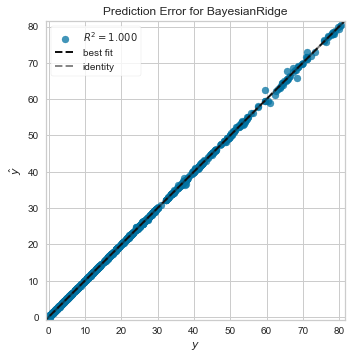

In [19]:
# Error plot
plot_model(tune_br, plot = 'error')

The *Prediction Error for BayesianRidge* plots an R² graphic, showing how well the model adjusts to our data. An R² of 0.9999 indicates that our model adjusts well to 99.99% of our data, which is **great**!

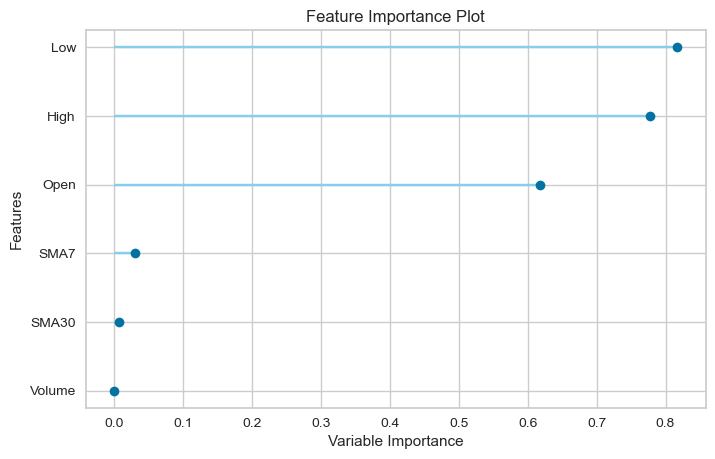

In [20]:
# Importance Feature Plot
plot_model(tune_br, plot = 'feature')

The *Feature Importance Plot* helps us to understand how our model is working with each feature of our dataset. For instance, we can see that the most useful feature for our model's predictions is the lower price negotiated for each trading day, while *volume* and the *simple moving average of 30 periods* weren't used at all.

# Finalizing Model

In [21]:
# Finalizing model
final_br_model = finalize_model(tune_br)

In [22]:
# Predicting last 2 years
prediction = predict_model(final_br_model,
                          data = aapl_predict)
prediction

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.7807,1.0969,1.0473,0.9979,0.0077,0.0057


,Open,High,Low,Close,Volume,SMA7,SMA30,Label
Date,,,,,,,,
2020-06-10,85.902091,87.598403,85.455173,87.121857,166651600,82.28,77.61,86.930828
2020-06-11,86.250247,86.682351,82.835402,82.939102,201662400,82.72,78.02,83.987464
2020-06-12,85.116913,85.877411,82.524294,83.655167,200146000,83.20,78.39,83.744594
2020-06-15,82.284775,85.353940,82.119338,84.689735,138808800,83.93,78.84,84.583990
2020-06-16,86.781125,87.210764,85.116913,86.934212,165428800,84.66,79.34,85.878905
...,...,...,...,...,...,...,...,...
2022-06-06,147.029999,148.570007,144.899994,146.139999,71598400,147.67,150.13,146.575149
2022-06-07,144.350006,149.000000,144.100006,148.710007,67808200,148.38,149.67,147.769839
2022-06-08,148.580002,149.869995,147.460007,147.960007,53950200,148.14,149.38,148.729242


Finally, in our dataframe above, we have the results!<br><br>
For each date we now have the Open, High, Low, **Close** , Volume, SMA7, SMA30 and **Label**, which represents the predicted closing price for AAPL in each one of the days included in the dataframe.

# Plotting Closing Prices and Predicted Prices for Apple Stocks

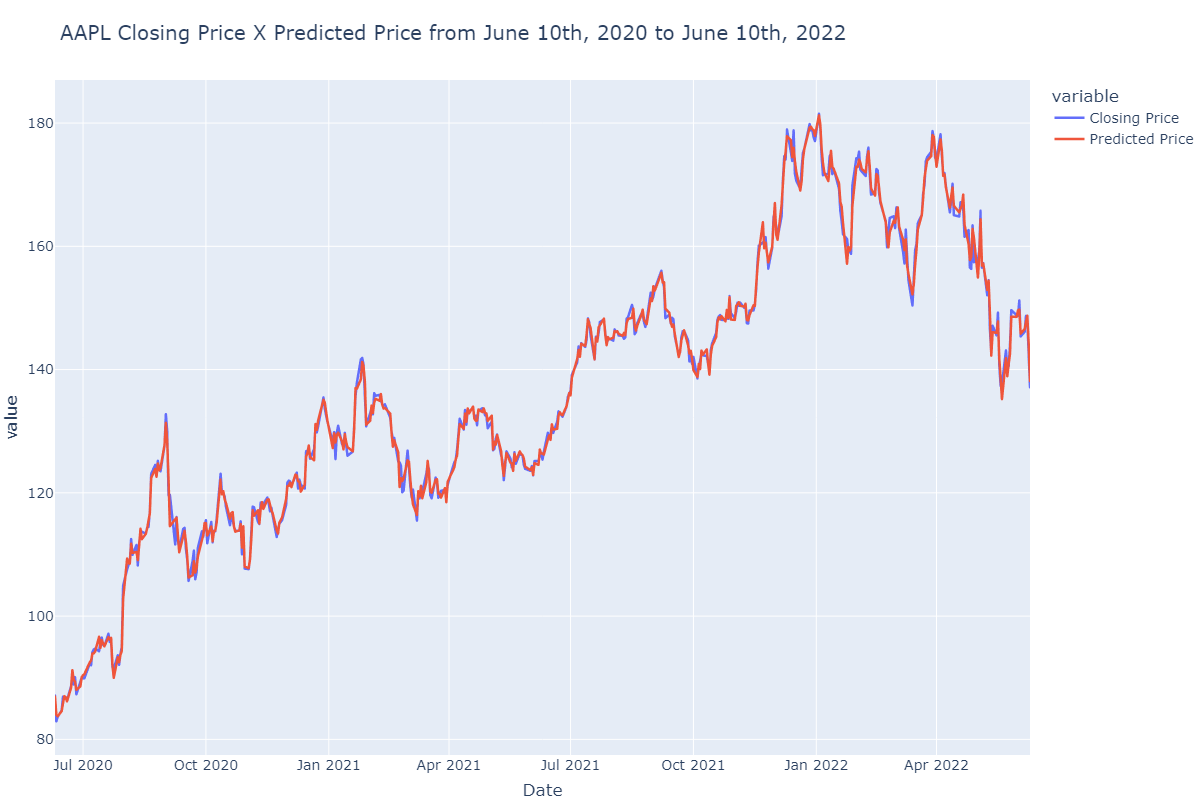

In [24]:
fig = px.line(round(prediction,2), 
              x = prediction.index, 
              y = ['Close','Label'],
             title = 'AAPL close price x predicted price from June 10th, 2020 to June 10th, 2022')
newnames = {'Close':'Closing Price', 'Label': 'Predicted Price'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.update_traces(line=dict(width=2.5))
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
     title='AAPL Closing Price X Predicted Price from June 10th, 2020 to June 10th, 2022',
    margin=dict(l=0, r=0, t=80, b=0),
    font=dict(size=14)
)
fig.show("png")

# Conclusion<br><br>
We can conclude that the PyCaret lib offers an easy way to explore and test different regression models of **machine learning** and choose which one of them is the best for de dataset used.<br><br>
With this study, it was possible to find a model that adjusted **very well** to our data and that was capable to predict the closing prices of the last 2 years with high levels of accuracy, sucessfuly indicating the direction of APPL stocks in that period.<br><br>
Once again, I reinforce that this project has the sole goal of exploring PyCaret's Regression lib and I've no intention of recommending the purchase or sale of any financial asset nor I recommend using this strategy blindly to make investment decisions. 